In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
palette_color = sns.color_palette('pastel')

#untuk dapat melihat seluruh kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<ipython-input-83-e9a6b8f31d09>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# TITANIC - DATA VISUALIZATION


Dataset Titanic merupakan salah satu set data paling terkenal dan banyak dipelajari dalam dunia data science dan machine learning. Popularitasnya berasal dari cerita tragis tenggelamnya RMS Titanic pada perjalanan perdana tahun 1912, yang menyebabkan lebih dari 1.500 penumpang dan awak kapal meninggal. Dataset ini memberikan informasi detil tentang status kelangsungan hidup penumpang Titanic, termasuk usia, jenis kelamin, kelas tiket, tarif yang dibayar, dan banyak lagi.

source: https://www.kaggle.com/competitions/titanic/

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/GreatEdu/titanic_train - titanic_train.csv")
print(df.shape)

(891, 12)


In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13,NaN,S
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21,NaN,S
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26,NaN,S


### **Penjelasan dataset**
Setiap penumpang dalam dataset Titanic diidentifikasi dengan
 - PassengerId  
 - Survived: status kelangsungan hidupnya (1 untuk selamat, 0 untuk tidak selamat).

Informasi tambahan meliputi:
- Pclass (kelas sosial ekonomi penumpang),
- Name (nama penumpang),
- Sex (jenis kelamin),
- Age (umur),
- SibSp (jumlah saudara atau pasangan),
- Parch (jumlah orang tua atau anak),
- Ticket (nomor tiket),
- Fare (tarif perjalanan),
- Cabin (nomor kabin), dan
- Embarked (pelabuhan keberangkatan).

Tipe data:
- Numeric - Continuous : Fare, Age
- Numeric - Discrete : SibSp, Parch
- Category Ordinal : pclass (1st = Upper, 2nd = Middle, 3rd = Lower)
- Category Nominal : sex, embarked

In [ ]:
# Mengganti nilai non-numerik dengan NaN
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

#analisa deskriptif untuk tipe data numerik
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,868.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,79.029258
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,163.021485
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.400000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,47.700000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,910.792000


## Visualisasi Setiap Kolom / Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


<Axes: xlabel='count', ylabel='Survived'>

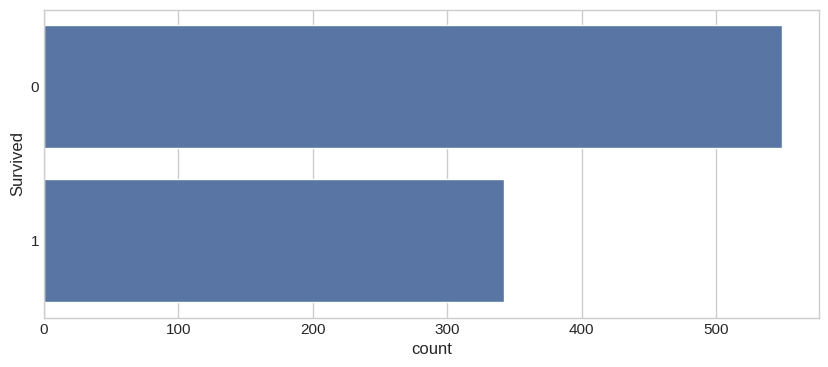

In [ ]:
# perbandingan jumlah penumpang yang selamat
fig = plt.figure(figsize=(10,4))
print(df['Survived'].value_counts())
# df['Survived'].value_counts().plot.bar()
sns.countplot(y='Survived', data=df)

kesimpulan : lebih banyak penumpang yang tidak selamat

male      577
female    314
Name: Sex, dtype: int64


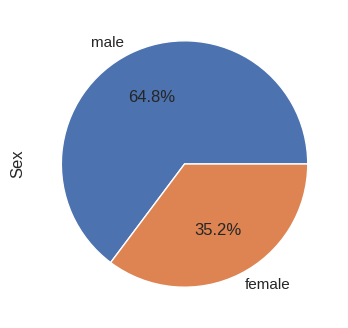

In [ ]:
# perbandingan jenis kelamin penumpang
fig = plt.figure(figsize=(10,4))
# sns.countplot(y='Sex', data=df)
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Sex'].value_counts())

kesimpulan : jumlah penumpang laki-laki jauh lebih banyak dibandingkan perempuan

S    644
C    168
Q     77
Name: Embarked, dtype: int64


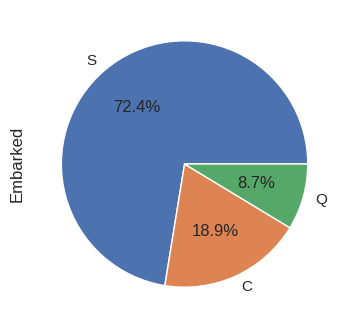

In [ ]:
# perbandingan tempat keberangkatan
fig = plt.figure(figsize=(10,4))
df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Embarked'].value_counts())

kesimpulan = mayoritas penumpang (72.4%) berangkat dari kota S

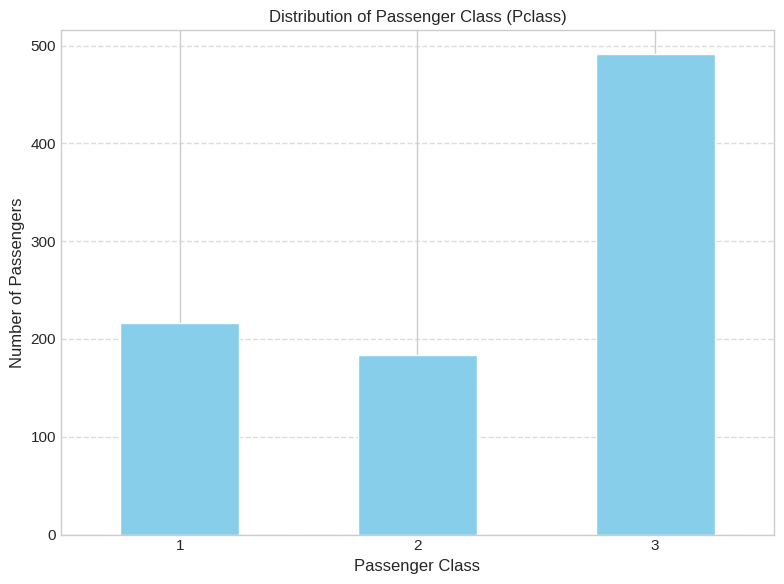


Kesimpulan:
Dari visualisasi tersebut, dapat dilihat bahwa distribusi jumlah penumpang
di setiap kelas. Paling banyak penumpang berada di kelas 3, diikuti oleh
kelas 1 dan kelas 2. Hal ini menunjukkan bahwa mayoritas penumpang pada
kapal Titanic adalah penumpang kelas 3. Jumlah penumpang kelas 1 lebih
sedikit dibandingkan dengan kelas 3 dan 2.


In [ ]:
# Task 1 - Gambarkan Distribusi pclass, gunakan visualisasi yang cocok kemudian berikan kesimpulan
pclass_counts = df['Pclass'].value_counts().sort_index()

# Membuat diagram batang
plt.figure(figsize=(8, 6))
pclass_counts.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Distribution of Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')

# Menampilkan plot
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print ('')
print ('Kesimpulan:')
print('Dari visualisasi tersebut, dapat dilihat bahwa distribusi jumlah penumpang\ndi setiap kelas. Paling banyak penumpang berada di kelas 3, diikuti oleh\nkelas 1 dan kelas 2. Hal ini menunjukkan bahwa mayoritas penumpang pada\nkapal Titanic adalah penumpang kelas 3. Jumlah penumpang kelas 1 lebih\nsedikit dibandingkan dengan kelas 3 dan 2.')


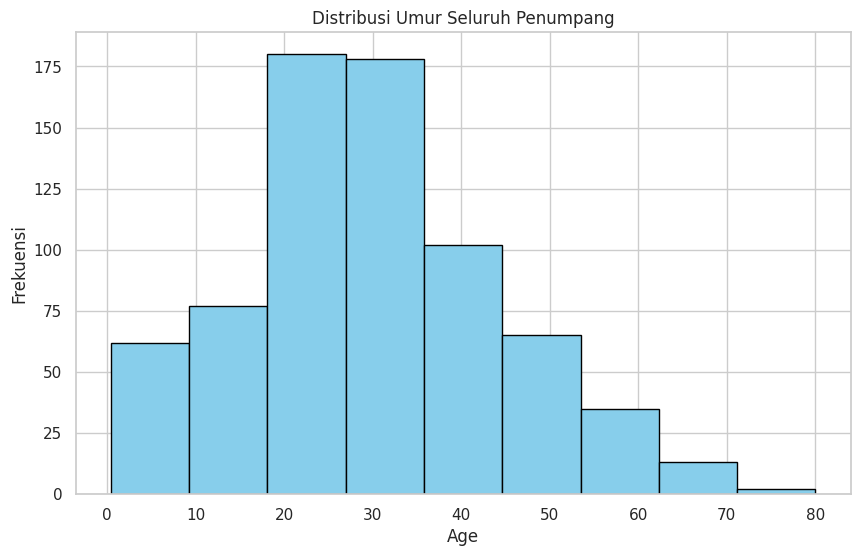


Kesimpulan:
Berdasarkan distribusi umur seluruh penumpang yang digambarkan dalam histogram:
Mayoritas penumpang berada dalam rentang umur antara 20 hingga 40 tahun, dengan puncak frekuensi terjadi
di sekitar rentang tersebut.


In [ ]:
# Task 2 - Gambarkan Distribusi umur seluruh penumpang, gunakan visualisasi yang cocok kemudian berikan kesimpulan
# Menggunakan seaborn
sns.set(style="whitegrid")

# Membuat histogram umur
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=9, color='skyblue', edgecolor='black')
plt.title('Distribusi Umur Seluruh Penumpang')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()
print('')
print ('Kesimpulan:')
print('Berdasarkan distribusi umur seluruh penumpang yang digambarkan dalam histogram:\nMayoritas penumpang berada dalam rentang umur antara 20 hingga 40 tahun, dengan puncak frekuensi terjadi\ndi sekitar rentang tersebut.')

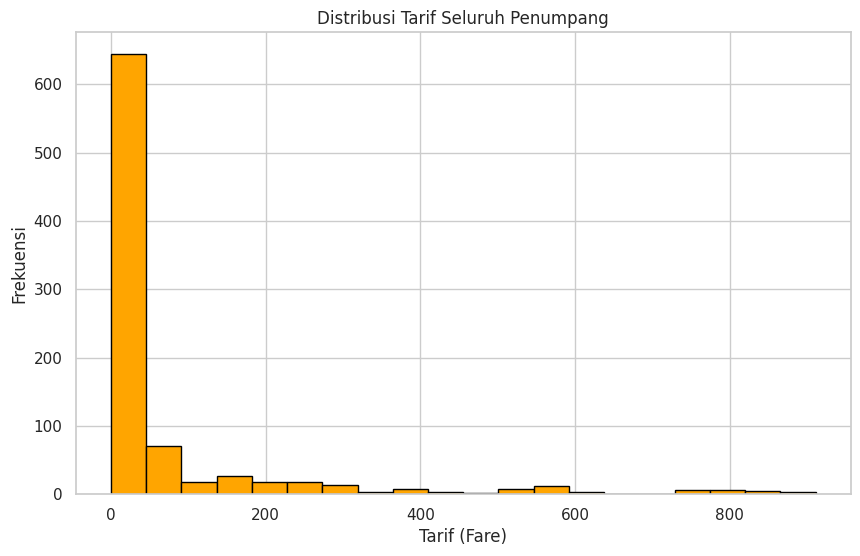


Kesimpulan:
Mayoritas penumpang membayar tarif yang relatif rendah, tetapi terdapat beberapa penumpang
yang membayar tarif yang jauh lebih tinggi.


In [ ]:
# Task 3 - Gambarkan Distribusi fare seluruh penumpang, gunakan visualisasi yang cocok kemudian berikan kesimpulan
# Membuat histogram fare
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=20, color='orange', edgecolor='black')
plt.title('Distribusi Tarif Seluruh Penumpang')
plt.xlabel('Tarif (Fare)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()
print('')
print ('Kesimpulan:')
print('Mayoritas penumpang membayar tarif yang relatif rendah, tetapi terdapat beberapa penumpang\nyang membayar tarif yang jauh lebih tinggi.')

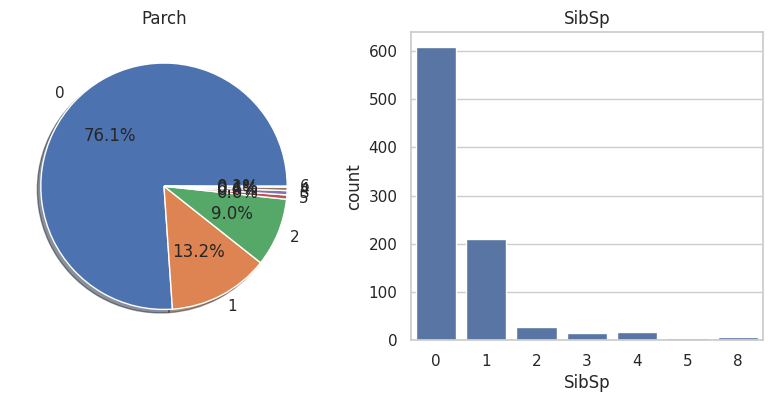

In [ ]:
#persebaran Parch & SibSp
f,ax=plt.subplots(1,2,figsize=(10,4))
df['Parch'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Parch')
ax[0].set_ylabel('')
sns.countplot(x='SibSp',data=df,ax=ax[1])
ax[1].set_title('SibSp')
plt.show()

kesimpulan : mayoritas penumpang adalah solo traveler

## Bivariate Analysis for Survived

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<ipython-input-96-d50229ea65e7>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


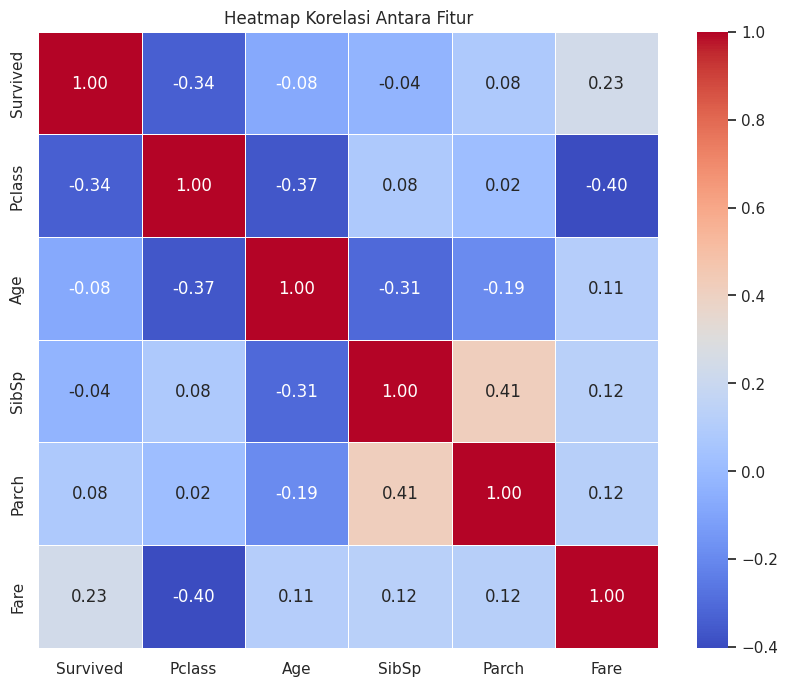


Kesimpulan:
Berdasarkan heatmap korelasi:
- Terdapat korelasi negatif yang signifikan antara kelas penumpang (Pclass) dan keselamatan (Survived),
  menunjukkan bahwa semakin tinggi kelas penumpang, semakin rendah kemungkinan bertahan hidup.
- Terdapat juga korelasi positif yang moderat antara tarif (Fare) dan keselamatan (Survived),
  menunjukkan bahwa penumpang dengan tarif yang lebih tinggi cenderung memiliki peluang bertahan hidup yang lebih tinggi.
- Tidak terlihat korelasi yang signifikan antara umur (Age), jumlah saudara (SibSp), dan jumlah orang tua/anak (Parch)
 dengan keselamatan (Survived) berdasarkan heatmap ini.


In [ ]:
# Task 4 : tampilkan heatmap correlation untuk kolom 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'
# Memilih kolom yang akan dihitung korelasinya
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
selected_data = df[selected_columns]

# Menghitung korelasi antar kolom
correlation_matrix = selected_data.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antara Fitur')
plt.show()
print('')
print ('Kesimpulan:')
# dan tuliskan kesimpulan yang menarik dari heatmap tersebut
print('Berdasarkan heatmap korelasi:\n- Terdapat korelasi negatif yang signifikan antara kelas penumpang (Pclass) dan keselamatan (Survived),\n  menunjukkan bahwa semakin tinggi kelas penumpang, semakin rendah kemungkinan bertahan hidup.\n- Terdapat juga korelasi positif yang moderat antara tarif (Fare) dan keselamatan (Survived),\n  menunjukkan bahwa penumpang dengan tarif yang lebih tinggi cenderung memiliki peluang bertahan hidup yang lebih tinggi.\n- Tidak terlihat korelasi yang signifikan antara umur (Age), jumlah saudara (SibSp), dan jumlah orang tua/anak (Parch)\n dengan keselamatan (Survived) berdasarkan heatmap ini.')

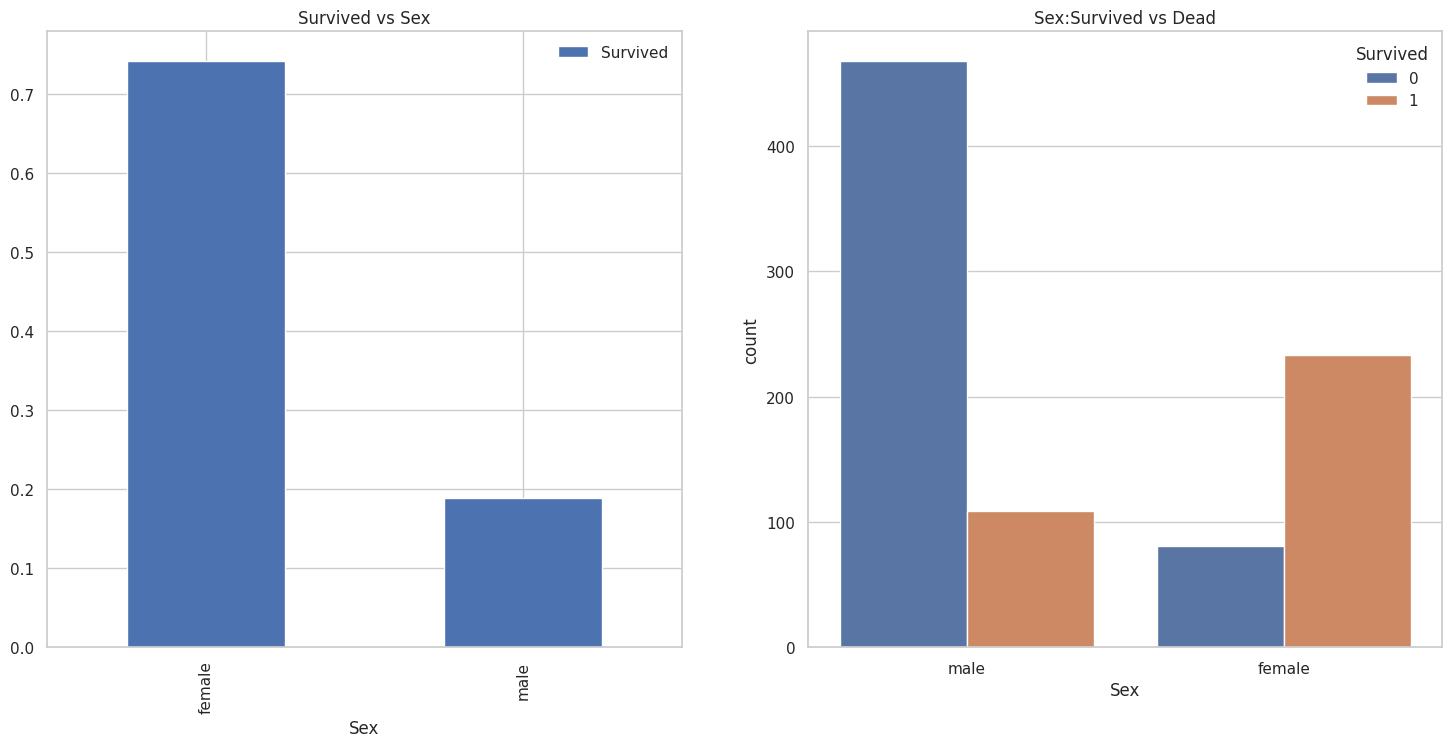

In [ ]:
# Perbandingan Sex dengan Survived
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Kesimpulan : pada plot di atas memiliki distribusi yang berbeda antara male dan female, dimana mayoritas male tidak selamat sedangkan mayoritas female selamat

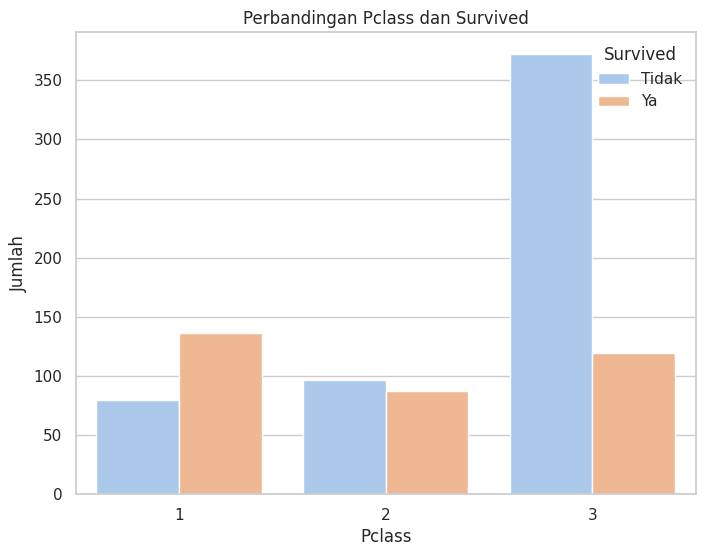


Kesimpulan:
- Terlihat bahwa penumpang kelas 1 (Pclass=1) memiliki tingkat kelangsungan hidup yang jauh lebih tinggi dibandingkan dengan penumpang kelas lainnya.
- Penumpang kelas 3 (Pclass=3) memiliki tingkat kelangsungan hidup yang paling rendah, dengan jumlah penumpang yang tidak selamat jauh lebih besar dibandingkan yang selamat.
- Perbedaan signifikan dalam tingkat kelangsungan hidup antar kelas menunjukkan bahwa kelas sosial atau ekonomi memiliki pengaruh yang kuat terhadap kemungkinan bertahan hidup penumpang, dengan penumpang kelas atas memiliki prioritas akses ke perahu penyelamat.


In [ ]:
# Task 5 - Gambarkan Distribusi perbandingan antara Pclass dan Survived,
# gunakan visualisasi yang cocok kemudian berikan kesimpulan
# Memvisualisasikan distribusi perbandingan antara Pclass dan Survived
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title('Perbandingan Pclass dan Survived')
plt.xlabel('Pclass')
plt.ylabel('Jumlah')
plt.legend(title='Survived', loc='upper right', labels=['Tidak', 'Ya'])
plt.show()
print('')
print('Kesimpulan:\n- Terlihat bahwa penumpang kelas 1 (Pclass=1) memiliki tingkat kelangsungan hidup yang jauh lebih tinggi dibandingkan dengan penumpang kelas lainnya.\n- Penumpang kelas 3 (Pclass=3) memiliki tingkat kelangsungan hidup yang paling rendah, dengan jumlah penumpang yang tidak selamat jauh lebih besar dibandingkan yang selamat.\n- Perbedaan signifikan dalam tingkat kelangsungan hidup antar kelas menunjukkan bahwa kelas sosial atau ekonomi memiliki pengaruh yang kuat terhadap kemungkinan bertahan hidup penumpang, dengan penumpang kelas atas memiliki prioritas akses ke perahu penyelamat.')

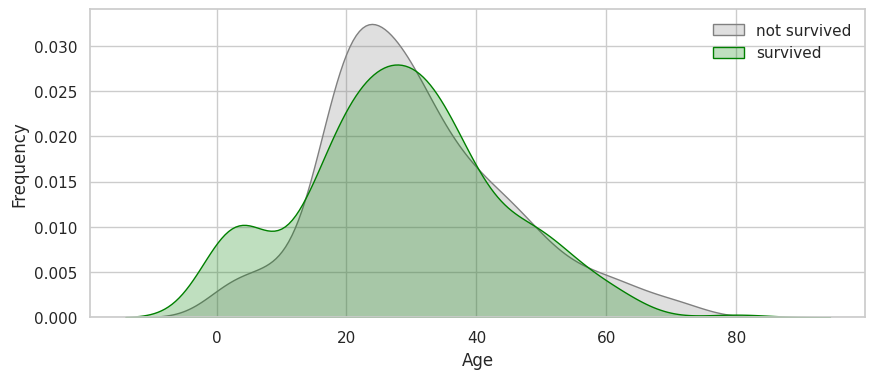

In [ ]:
# Perbandingan Age dengan Survived dengan Kernel Density Plot
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='gray',fill=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='green',fill=True, label='survived')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.legend()

Tidak ada yang perbedaan yang terlihat plot ini, kecuali bagian paling kiri distribusinya. Ini mungkin mengisyaratkan kemungkinan bahwa anak-anak dan bayi menjadi prioritas.

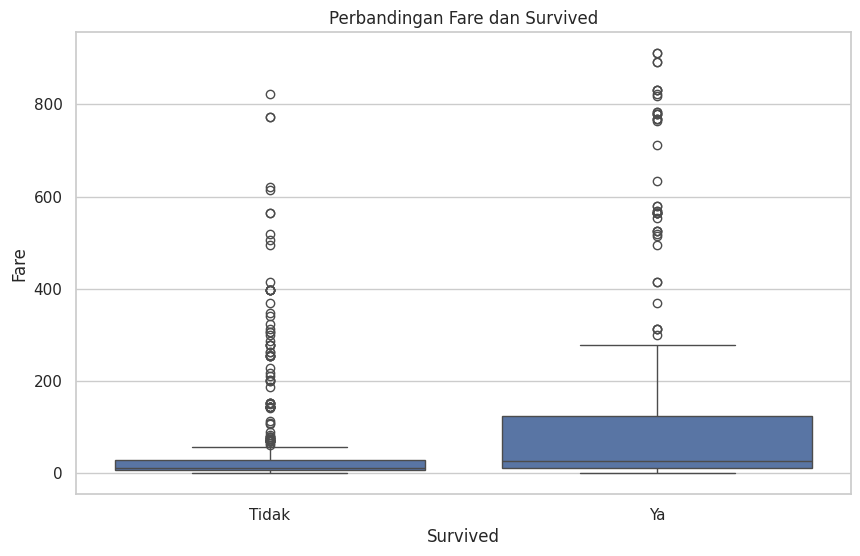


Kesimpulan:
- Terlihat bahwa penumpang yang selamat cenderung membayar tarif (fare) yang lebih tinggi dibandingkan dengan penumpang yang tidak selamat.
- Distribusi tarif penumpang yang selamat memiliki rentang yang lebih luas dibandingkan dengan yang tidak selamat.
- Penumpang dengan tarif yang lebih tinggi cenderung memiliki peluang bertahan hidup yang lebih tinggi, yang dapat mencerminkan prioritas akses ke perahu penyelamat atau lokasi kabin yang lebih aman bagi penumpang dengan tarif yang lebih tinggi.


In [ ]:
# Task 6 - Gambarkan Distribusi perbandingan antara Fare dan Survived,
# gunakan visualisasi yang cocok kemudian berikan kesimpulan
# Memvisualisasikan distribusi perbandingan antara Fare dan Survived
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Perbandingan Fare dan Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks(ticks=[0, 1], labels=['Tidak', 'Ya'])
plt.show()
print('')
print('Kesimpulan:\n- Terlihat bahwa penumpang yang selamat cenderung membayar tarif (fare) yang lebih tinggi dibandingkan dengan penumpang yang tidak selamat.\n- Distribusi tarif penumpang yang selamat memiliki rentang yang lebih luas dibandingkan dengan yang tidak selamat.\n- Penumpang dengan tarif yang lebih tinggi cenderung memiliki peluang bertahan hidup yang lebih tinggi, yang dapat mencerminkan prioritas akses ke perahu penyelamat atau lokasi kabin yang lebih aman bagi penumpang dengan tarif yang lebih tinggi.')

## Multivariate Analysis

<Axes: xlabel='Pclass', ylabel='Age'>

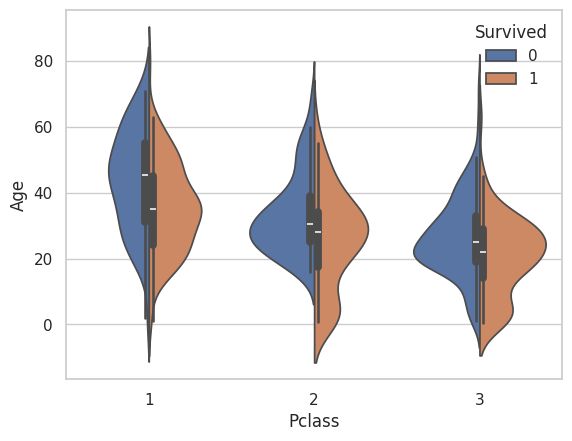

In [ ]:
# Analisis Pclass, Age dan Survived
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)

<Axes: xlabel='Sex', ylabel='Age'>

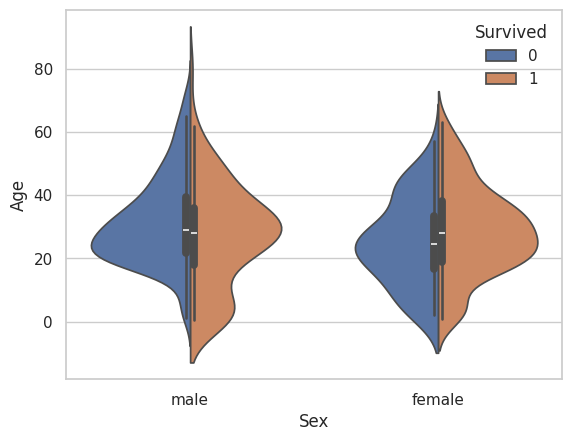

In [ ]:
# Analisis Sex, Age dan Survived
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

In [ ]:
# Task 7-10 Buatlah tambahan 4 plot analisa, Anda dibebaskan untuk membuat data visualisasi
# dengan kombinasi data yang berbeda untuk menemukan informasi menarik mengenai dataset Titanic ini
# dan berikan kesimpulan Anda terhadap analisa yang anda buat

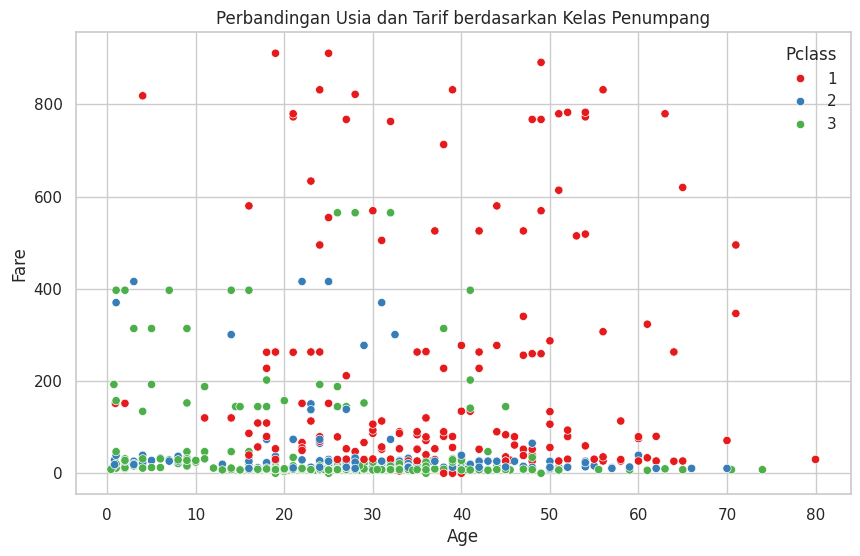


Kesimpulan:
- Terlihat adanya pola bahwa penumpang dengan tarif lebih tinggi cenderung lebih tua, terutama di kelas atas (Pclass=1).
- Penumpang kelas atas (Pclass=1) memiliki variasi tarif yang jauh lebih besar dibandingkan dengan kelas lainnya.


In [ ]:
# Task 7: Perbandingan antara Usia (Age) dan Tarif (Fare) berdasarkan Kelas Penumpang (Pclass)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass', palette='Set1')
plt.title('Perbandingan Usia dan Tarif berdasarkan Kelas Penumpang')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Pclass')
plt.show()
print('')
print('Kesimpulan:\n- Terlihat adanya pola bahwa penumpang dengan tarif lebih tinggi cenderung lebih tua, terutama di kelas atas (Pclass=1).\n- Penumpang kelas atas (Pclass=1) memiliki variasi tarif yang jauh lebih besar dibandingkan dengan kelas lainnya.')

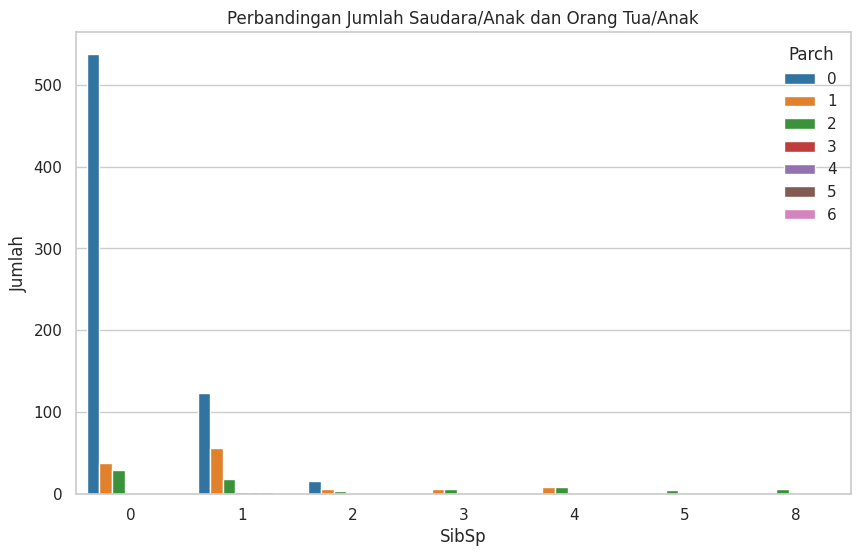


Kesimpulan:
- Mayoritas penumpang adalah solo traveler yang tidak memiliki saudara/anak maupun orang tua/anak di kapal.


In [ ]:
# Task 8: Perbandingan antara Jumlah Saudara/Anak (SibSp) dan Orang Tua/Anak (Parch)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SibSp', hue='Parch', palette='tab10')
plt.title('Perbandingan Jumlah Saudara/Anak dan Orang Tua/Anak')
plt.xlabel('SibSp')
plt.ylabel('Jumlah')
plt.legend(title='Parch')
plt.show()
print('')
print('Kesimpulan:\n- Mayoritas penumpang adalah solo traveler yang tidak memiliki saudara/anak maupun orang tua/anak di kapal.')

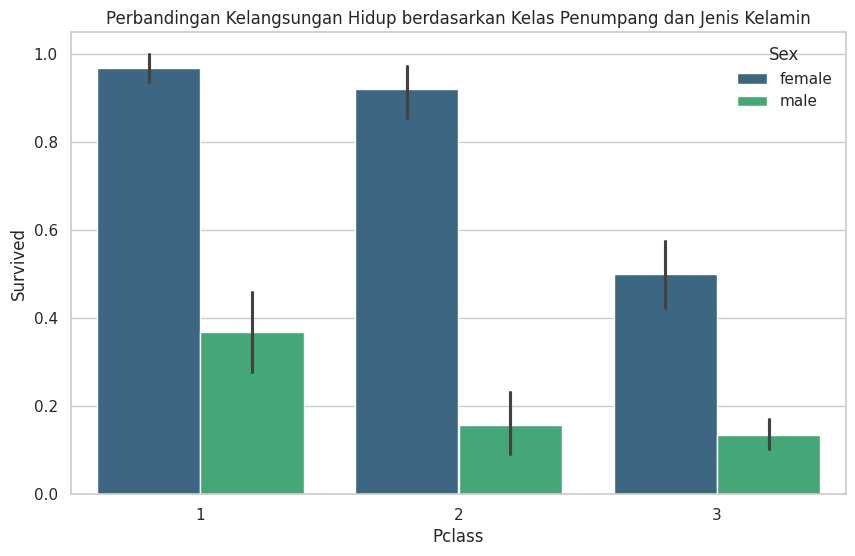


Kesimpulan:
- Terlihat bahwa tingkat kelangsungan hidup penumpang perempuan jauh lebih tinggi daripada penumpang laki-laki di setiap kelas penumpang.


In [ ]:
# Task 9: Perbandingan antara Kelas Penumpang (Pclass) dan Kelangsungan Hidup (Survived) berdasarkan Jenis Kelamin (Sex)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', palette='viridis')
plt.title('Perbandingan Kelangsungan Hidup berdasarkan Kelas Penumpang dan Jenis Kelamin')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.legend(title='Sex')
plt.show()
print('')
print('Kesimpulan:\n- Terlihat bahwa tingkat kelangsungan hidup penumpang perempuan jauh lebih tinggi daripada penumpang laki-laki di setiap kelas penumpang.')

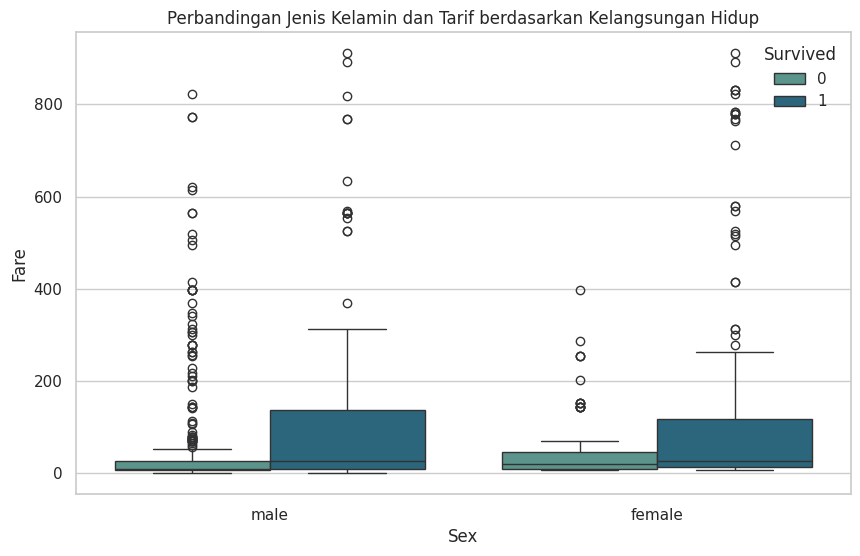


Kesimpulan:
- Terlihat bahwa penumpang yang selamat, baik laki-laki maupun perempuan, cenderung membayar tarif yang lebih tinggi daripada penumpang yang tidak selamat.
- Juga terlihat bahwa penumpang perempuan yang selamat cenderung membayar tarif yang lebih tinggi dibandingkan penumpang laki-laki yang selamat.


In [ ]:
# Task 10: Perbandingan antara Jenis Kelamin (Sex) dan Tarif (Fare) berdasarkan Kelangsungan Hidup (Survived)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sex', y='Fare', hue='Survived', palette='crest')
plt.title('Perbandingan Jenis Kelamin dan Tarif berdasarkan Kelangsungan Hidup')
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()
print('')
print('Kesimpulan:\n- Terlihat bahwa penumpang yang selamat, baik laki-laki maupun perempuan, cenderung membayar tarif yang lebih tinggi daripada penumpang yang tidak selamat.\n- Juga terlihat bahwa penumpang perempuan yang selamat cenderung membayar tarif yang lebih tinggi dibandingkan penumpang laki-laki yang selamat.')